In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Tutoria - 18/03/2025

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/main/Music_DB.csv', decimal=',')
df.head(8)

,Energia,Ao_vivo,Tempo,Falado,Orgânico,Instrumental,Compasso,Dançabilidade,Tom,Duração,Força,Positividade,Modo,Tipo,Music_id,Playlist_name,Album_name,Artista,Music_name
0,0.964,0.1060,167.024,0.0644,0.000071,0.038700,4,0.392,10,200547,0.599722,0.269,0,audio_features,0faXHILILebCGnJBPU6KJJ,Angry,Phobia (Clean Version),Breaking Benjamin,The Diary of Jane - Single Version
1,0.955,0.3800,107.984,0.0653,0.000165,0.000014,4,0.533,8,216733,0.652529,0.550,1,audio_features,2yXyz4NLTZx9CLdXfLTp5E,Angry,Dear Agony,Breaking Benjamin,I Will Not Bow
2,0.939,0.6230,150.184,0.1130,0.000220,0.000000,4,0.524,9,184867,0.631393,0.661,1,audio_features,1Vej0qeQ3ioKwpI6FUbRv1,Angry,Hybrid Theory (Bonus Edition),Linkin Park,Papercut
3,0.969,0.0787,95.136,0.0491,0.001400,0.000001,4,0.492,9,157333,0.601243,0.538,1,audio_features,3K4HG9evC7dg3N0R9cYqk4,Angry,Hybrid Theory (Bonus Edition),Linkin Park,One Step Closer
4,0.970,0.0994,94.952,0.2120,0.030000,0.000000,4,0.512,8,200240,0.639293,0.427,0,audio_features,5egqKwgK5r5rvGD1LrtR7J,Angry,Hybrid Theory (Bonus Edition),Linkin Park,Points of Authority
5,0.864,0.2090,105.143,0.0584,0.009580,0.000000,4,0.556,3,216880,0.508745,0.400,0,audio_features,60a0Rd6pjrkxjPbaKzXjfq,Angry,Hybrid Theory (Bonus Edition),Linkin Park,In the End
6,0.908,0.6710,133.063,0.1840,0.014400,0.000000,4,0.603,11,184640,0.546135,0.457,1,audio_features,5rAxhWcgFng3s570sGO2F8,Angry,Hybrid Theory (Bonus Edition),Linkin Park,A Place for My Head
7,0.863,0.6390,110.018,0.0381,0.004600,0.000000,4,0.496,9,185587,0.619940,0.243,1,audio_features,2nLtzopw4rPReszdYBJU6h,Angry,Meteora,Linkin Park,Numb


In [3]:
print("Colunas:\n{}".format(df.columns.to_list()))

Colunas:
['Energia', 'Ao_vivo', 'Tempo', 'Falado', 'Orgânico', 'Instrumental', 'Compasso', 'Dançabilidade', 'Tom', 'Duração', 'Força', 'Positividade', 'Modo', 'Tipo', 'Music_id', 'Playlist_name', 'Album_name', 'Artista', 'Music_name']


# Objetivo

Este notebook é uma aplicação baseada no Notebook da aula prática oferecido pela professora Cibele. Boa parte dos códigos disponíveis aqui foram retirados daquele notebook. Aqui, implementamos os gráficos mostrados em forma de funções, de modo que a análise exploratória seja simplificada para ser feita apenas com o chamado de funções para diferentes combinações de variáveis.

# Análise Exploratória dos dados do Spotify

Comecemos reconhecendo as variáveis qualitativas e quantitativas. Uma forma de fazer isso rapidamente é através da construção de histogramas com um alto número de divisões. O seaborn não é capaz de dividir o grid no número de variáveis, já que ele apenas reconhece colunas individualmente, assim podemos transformar o conjunto de dados usando o método melt. 

In [4]:
# Para criar um grid e construir um gráfico para cada coluna do dataset, cada coluna deve possuir um nome em uma lista
g = sns.FacetGrid(df, col=df.columns, col_wrap = 4)

ValueError: 2

In [5]:
# Transforma o dataframe para um formato longo
df_melted = pd.melt(df, var_name='variable', value_name='value')
display( df_melted.head(5) )
display( df_melted.tail(5) )

,variable,value
0,Energia,0.964
1,Energia,0.955
2,Energia,0.939
3,Energia,0.969
4,Energia,0.97


,variable,value
146333,Music_name,Touch In The Night
146334,Music_name,Out on the Streets
146335,Music_name,Beyond the Burning Skies
146336,Music_name,Into the Heart of Danger
146337,Music_name,Out of Control


Também é importante que removamos variáveis de texto do DataFrame. Caso a variável de texto tenha apenas algumas categorias, como por exemplo "Playlist_name", poderíamos transformá-la para dados numéricos usando o pacote Scikit-Learn, como dado no exemplo abaixo.

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
df["Playlist_name"].unique()

array(['Angry', 'Annoying', 'Boring', 'Calm', 'Excited', 'Happy',
       'Nervous', 'Peaceful', 'Pleased', 'Relaxed', 'Sad', 'Sleepy'],
      dtype=object)

In [8]:
le = LabelEncoder()
le.fit(df["Playlist_name"])
playlist_name_encoded = le.transform(df["Playlist_name"])
df["Playlist_name_encoded"] = playlist_name_encoded

print("{} ... {}".format(df["Playlist_name"].to_list()[:5], df["Playlist_name"].to_list()[-5:]))
print(playlist_name_encoded)

['Angry', 'Angry', 'Angry', 'Angry', 'Angry'] ... ['Nervous', 'Nervous', 'Nervous', 'Nervous', 'Nervous']
[0 0 0 ... 6 6 6]


No nosso caso, as demais variáveis em texto correspondem a índices das músicas, não sendo interessante utilizar o LabelEncoder. Assim, apenas as removemos para a construção dos gráficos.

In [9]:
df_numeric = df.loc[:, ['Energia', 'Ao_vivo', 'Tempo', 'Falado', 'Orgânico', 'Instrumental',
                        'Compasso', 'Dançabilidade', 'Tom', 'Duração', 'Força', 'Positividade',
                        'Modo','Playlist_name_encoded']]
display( df_numeric.head(5) )
display( df_numeric.tail(5) )

df_numeric_melted = pd.melt(df_numeric, var_name='variable', value_name='value')

,Energia,Ao_vivo,Tempo,Falado,Orgânico,Instrumental,Compasso,Dançabilidade,Tom,Duração,Força,Positividade,Modo,Playlist_name_encoded
0,0.964,0.1060,167.024,0.0644,0.000071,0.038700,4,0.392,10,200547,0.599722,0.269,0,0
1,0.955,0.3800,107.984,0.0653,0.000165,0.000014,4,0.533,8,216733,0.652529,0.550,1,0
2,0.939,0.6230,150.184,0.1130,0.000220,0.000000,4,0.524,9,184867,0.631393,0.661,1,0
3,0.969,0.0787,95.136,0.0491,0.001400,0.000001,4,0.492,9,157333,0.601243,0.538,1,0
4,0.970,0.0994,94.952,0.2120,0.030000,0.000000,4,0.512,8,200240,0.639293,0.427,0,0


,Energia,Ao_vivo,Tempo,Falado,Orgânico,Instrumental,Compasso,Dançabilidade,Tom,Duração,Força,Positividade,Modo,Playlist_name_encoded
7697,0.920,0.0562,100.007,0.0369,0.002120,0.000008,4,0.544,4,272013,0.448745,0.683,0,6
7698,0.941,0.0852,124.977,0.0337,0.000026,0.000025,4,0.525,9,177347,0.665350,0.541,0,6
7699,0.933,0.1740,82.807,0.0774,0.000904,0.000008,4,0.445,4,279587,0.542875,0.517,0,6
7700,0.886,0.1120,110.021,0.0353,0.000091,0.000431,4,0.506,2,328787,0.630376,0.200,0,6
7701,0.966,0.1300,160.018,0.0656,0.000009,0.238000,4,0.445,4,225133,0.657885,0.486,0,6


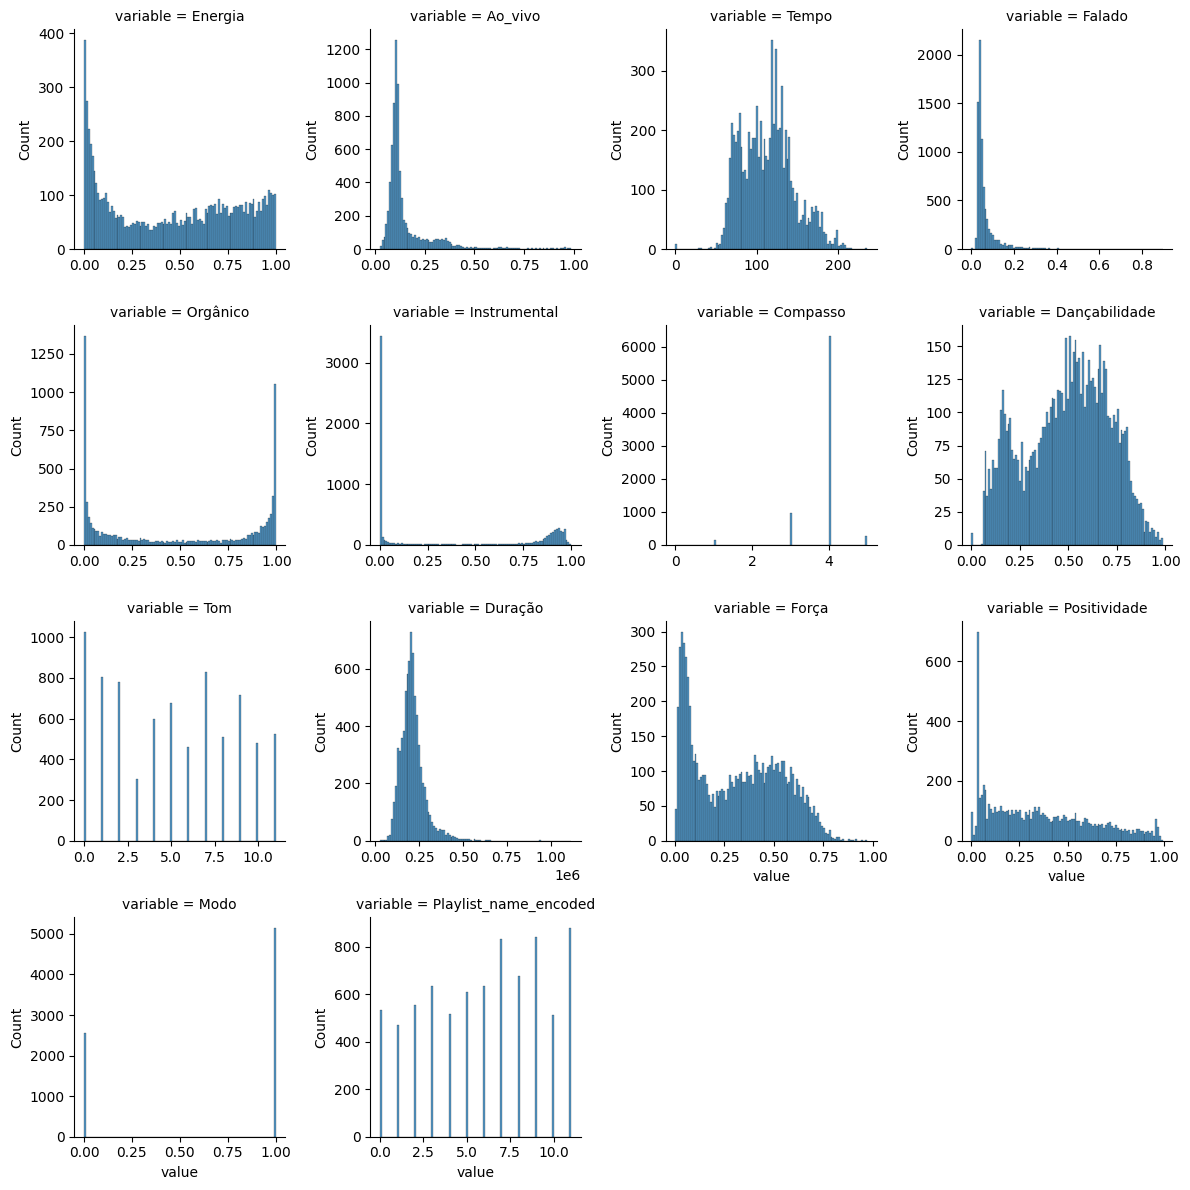

In [10]:
g = sns.FacetGrid(df_numeric_melted, col="variable", col_wrap = 4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value", bins = 100)

Pelos gráficos, fica evidente que as variáveis 'Energia', 'Ao_vivo', 'Tempo', 'Falado', 'Orgânico', 'Instrumental', 'Dançabilidade', 'Duração', 'Força' e 'Positividade' são quantitativas contínuas. Quanto as demais variáveis, é preciso um julgamento subjetivo de sua natureza. São quantitativas discretas ou são qualitativas

Um dado quantitativo discreta usualmente se refere a uma contagem de algo, ou seja, uma quantidade realmente palpável na vida real. Quando temos graus de escala menos óbvios, como por exemplo, o nível de satisfação do cliente, o grau de escolaridade, passamos a ter variáveis qualitativas ordinais. Veja que não faz sentido eu dizer que tenho 3 graus de escolaridade, mas faz sentido dizer que tenho 3 irmãos. Uma vez identificadas as variáveis discretas, esse julgamento deve ser feito para cada uma individualmente.

In [11]:
def bar_plot(df, variable_name, ax = None):
    # Tabela de frequências absolutas
    tab = pd.crosstab(index = df[variable_name], columns = 'frequência')
    tab_normalize = pd.crosstab(index = df[variable_name], columns = 'frequência', normalize='columns')

    if(ax is None):
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))
    
    # Supondo que 'tab' seja uma tabela ou DataFrame que já foi definido
    tab_normalize.plot.bar(
        color='skyblue',
        legend=False,
        ax = ax
    )
    title = "Gráfico de barras - {}".format(variable_name)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', rotation=0, labelsize = 12)
    
    # Faz o gráfico de barras por proporções, mas exibe as contagem em cima de cada barra
    for container in ax.containers:
        for rect in container.get_children():
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2.0, height, int(height * len(df[variable_name])), ha='center', va='bottom')

    ax.set_ylabel('Frequência', fontsize=12)
    ax.set_xlabel('Categorias', fontsize=12)

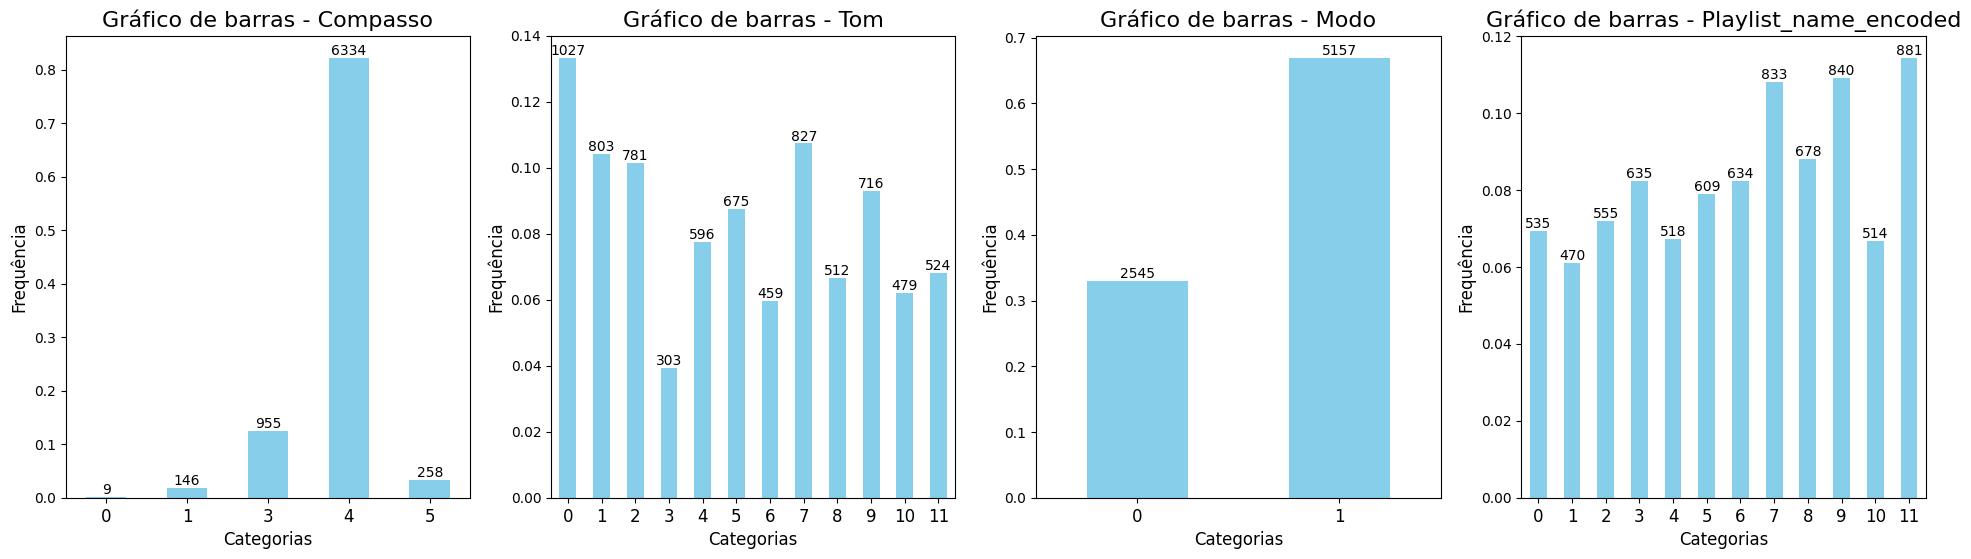

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (24, 6))

bar_plot(df, "Compasso", ax = ax[0])
bar_plot(df, "Tom", ax = ax[1])
bar_plot(df, "Modo", ax = ax[2])
bar_plot(df, "Playlist_name_encoded", ax = ax[3])

In [13]:
def sector_plot(df, variable_name, ax = None):
    # Configuração estética do Seaborn
    sns.set(style="whitegrid")
    tab = pd.crosstab(index = df[variable_name], columns = 'frequência')
    tab_series = tab['frequência']
    
    # Cria o gráfico de donut
    # plt.figure(figsize=(15, 7), dpi=80)
    if(ax is None):
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))
    
    # Cria o gráfico de donut
    tab_series.plot.pie(
        autopct = lambda pct: f'{pct:.0f}%',  # Adiciona os percentuais
        startangle = 90,                      # Inicia o gráfico a partir de 90 graus
        colors = sns.color_palette("pastel"), # Utiliza uma paleta de cores do Seaborn
        textprops = {'fontsize': 10},         # Ajusta o tamanho da fonte dos textos
        wedgeprops = {'width': 0.4},          # Ajusta a largura das fatias para criar o efeito donut
        pctdistance = 0.85,                   # Ajusta a distância dos percentuais
        ax = ax
    )
    
    # Adiciona um círculo branco no centro para criar o efeito donut
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    title = "Gráfico de setores - {}".format(variable_name)
    ax.set_title(title)

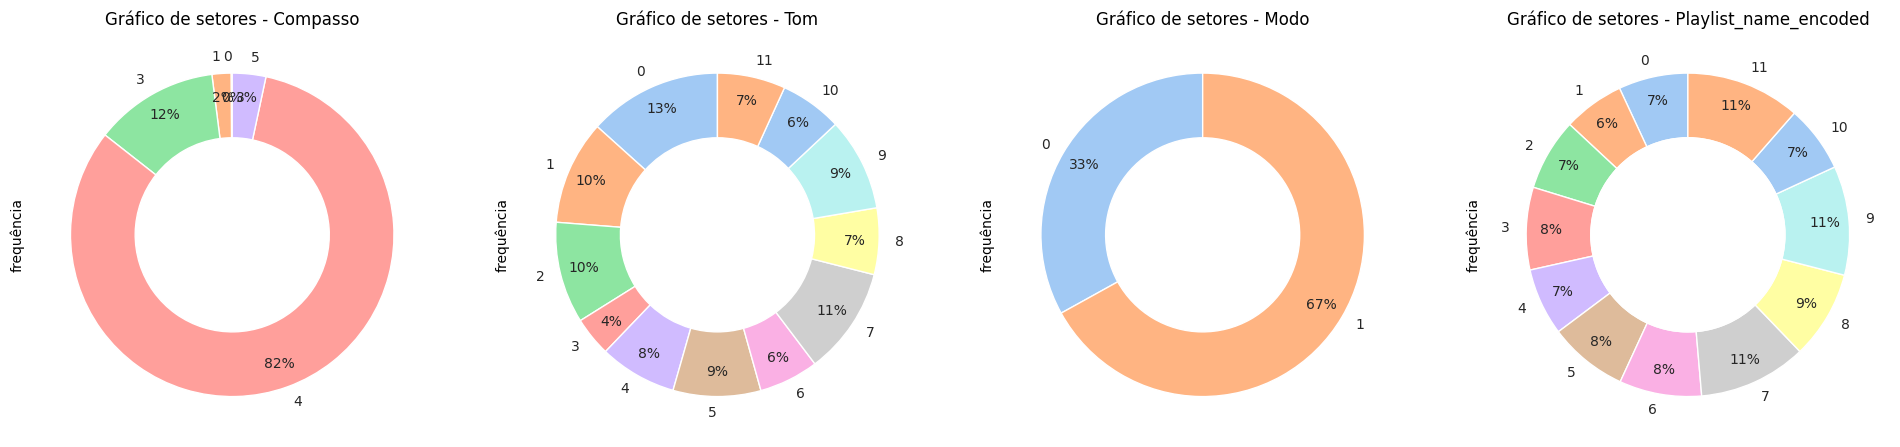

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (24, 6))

sector_plot(df, "Compasso", ax = ax[0])
sector_plot(df, "Tom", ax = ax[1])
sector_plot(df, "Modo", ax = ax[2])
sector_plot(df, "Playlist_name_encoded", ax = ax[3])

In [15]:
def histogram_plot(df, variable_name, ax1 = None, ax2 = None):
    if(ax1 is None and ax2 is None):
        fig, ax = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 10]})
        ax1 = ax[0]
        ax2 = ax[1]
    # Boxplots
    sns.boxplot(x = df[variable_name], ax = ax1)
    # Histogramas
    sns.histplot(df[variable_name], kde = True, ax = ax2)

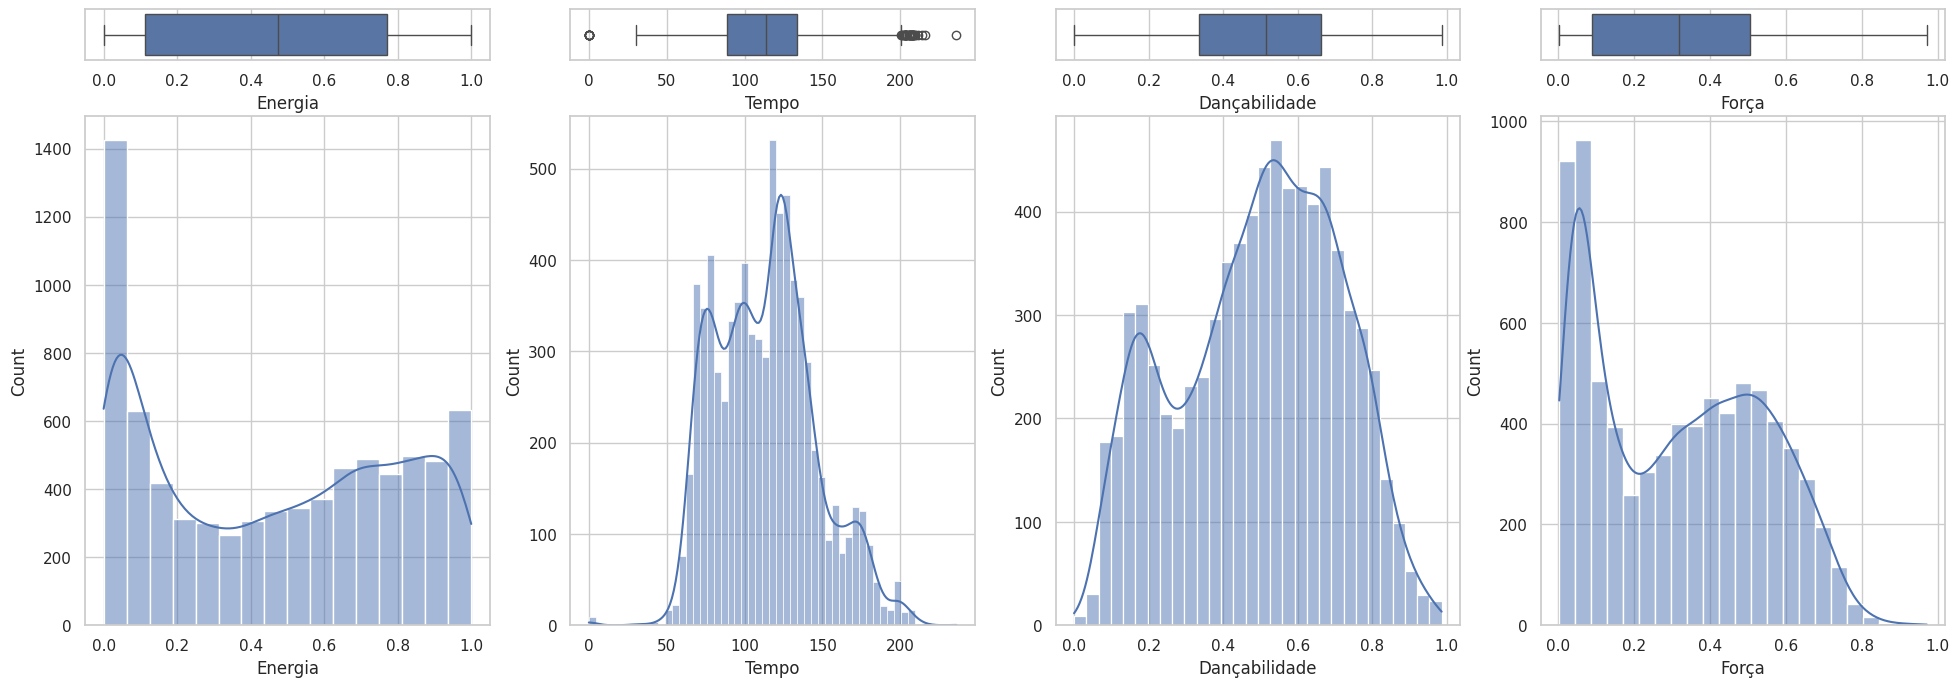

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(24, 8), gridspec_kw={'height_ratios': [1, 10]})

histogram_plot(df, "Energia", ax1 = ax[0,0], ax2 = ax[1,0])
histogram_plot(df, "Tempo", ax1 = ax[0,1], ax2 = ax[1,1])
histogram_plot(df, "Dançabilidade", ax1 = ax[0,2], ax2 = ax[1,2])
histogram_plot(df, "Força", ax1 = ax[0,3], ax2 = ax[1,3])

In [17]:
def pair_plot(df, variables, hue = None, regplot = True):
    def corrfunc(x, y, hue, **kws):
        if(hue is not None):
            # Número de classes
            num_classes = len(hue.unique())
        
            color_palette = sns.color_palette().as_hex()
            
            # Para cada classe, calcula as correlações
            corrs = []
            for class_value in hue.unique():
                corr = np.corrcoef(x[hue == class_value], y[hue == class_value])[0, 1]
                corrs.append(corr)
            corr_xy = np.corrcoef(x, y)[0, 1]
            
            ax = plt.gca()
        
            # Divide o espaço do grid no número de classes
            y_positions = np.linspace(0, 1, num_classes + 2)[1:-1]
            
            for j in range(len(corrs)):
                ax.annotate("{:.2f}".format(corrs[j], hue.unique()[j]), xy=(0.3, y_positions[j]), xycoords=ax.transAxes,
                            ha='center', va='center', fontsize=18, color=color_palette[j])
            
            # Adiciona a correlação geral desconsiderando as classes (em preto)
            ax.annotate("({:.2f})".format(corr_xy), xy=(0.75, 0.5), xycoords=ax.transAxes,
                        ha='center', va='center', fontsize=18, color="black")
        else:
            ax = plt.gca()
            corr_xy = np.corrcoef(x, y)[0, 1]
            # Adiciona a correlação geral desconsiderando as classes (em preto)
            ax.annotate("{:.2f}".format(corr_xy), xy=(0.5, 0.5), xycoords=ax.transAxes,
                        ha='center', va='center', fontsize=18, color="black")

    # Custom regplot function to color regression lines
    def regplot_hue(x, y, hue, **kwargs):
        ax = plt.gca()

        for i, class_value in enumerate(np.unique(hue)):
            xp = x[hue == class_value]
            yp = y[hue == class_value]
            sns.regplot(x = xp, y = yp, scatter=False, 
                        line_kws={"color": sns.color_palette()[i]}, ax = ax)

    if(hue is not None):
        df = df.loc[:, variables + [hue] ]
        df[hue] = df[hue].astype(str)
    else:
        df = df.loc[:, variables]
    
    if(hue is None):
        g = sns.PairGrid(df, diag_sharey = False)
        g.map_lower(sns.scatterplot, data = df, alpha=0.7)
        g.map_lower(sns.regplot, scatter=False, color = "black")
    else:
        g = sns.PairGrid(df, hue = hue, diag_sharey = False)
        g.map_lower(sns.scatterplot, hue = hue, data = df, alpha=0.7)
        g.map_lower(regplot_hue)

    g.map_diag(sns.histplot, kde=True)
    g.map_upper(corrfunc)

    if(hue is not None):
        # Adiciona a legenda ao grid manualmente
        handles = [plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=sns.color_palette()[i], markersize=10, 
                               label=species)
                   for i, species in enumerate(df[hue].unique())]
        
        plt.legend(handles=handles, title=hue, loc="upper left", bbox_to_anchor=(1, 1))

    
    
    plt.show()


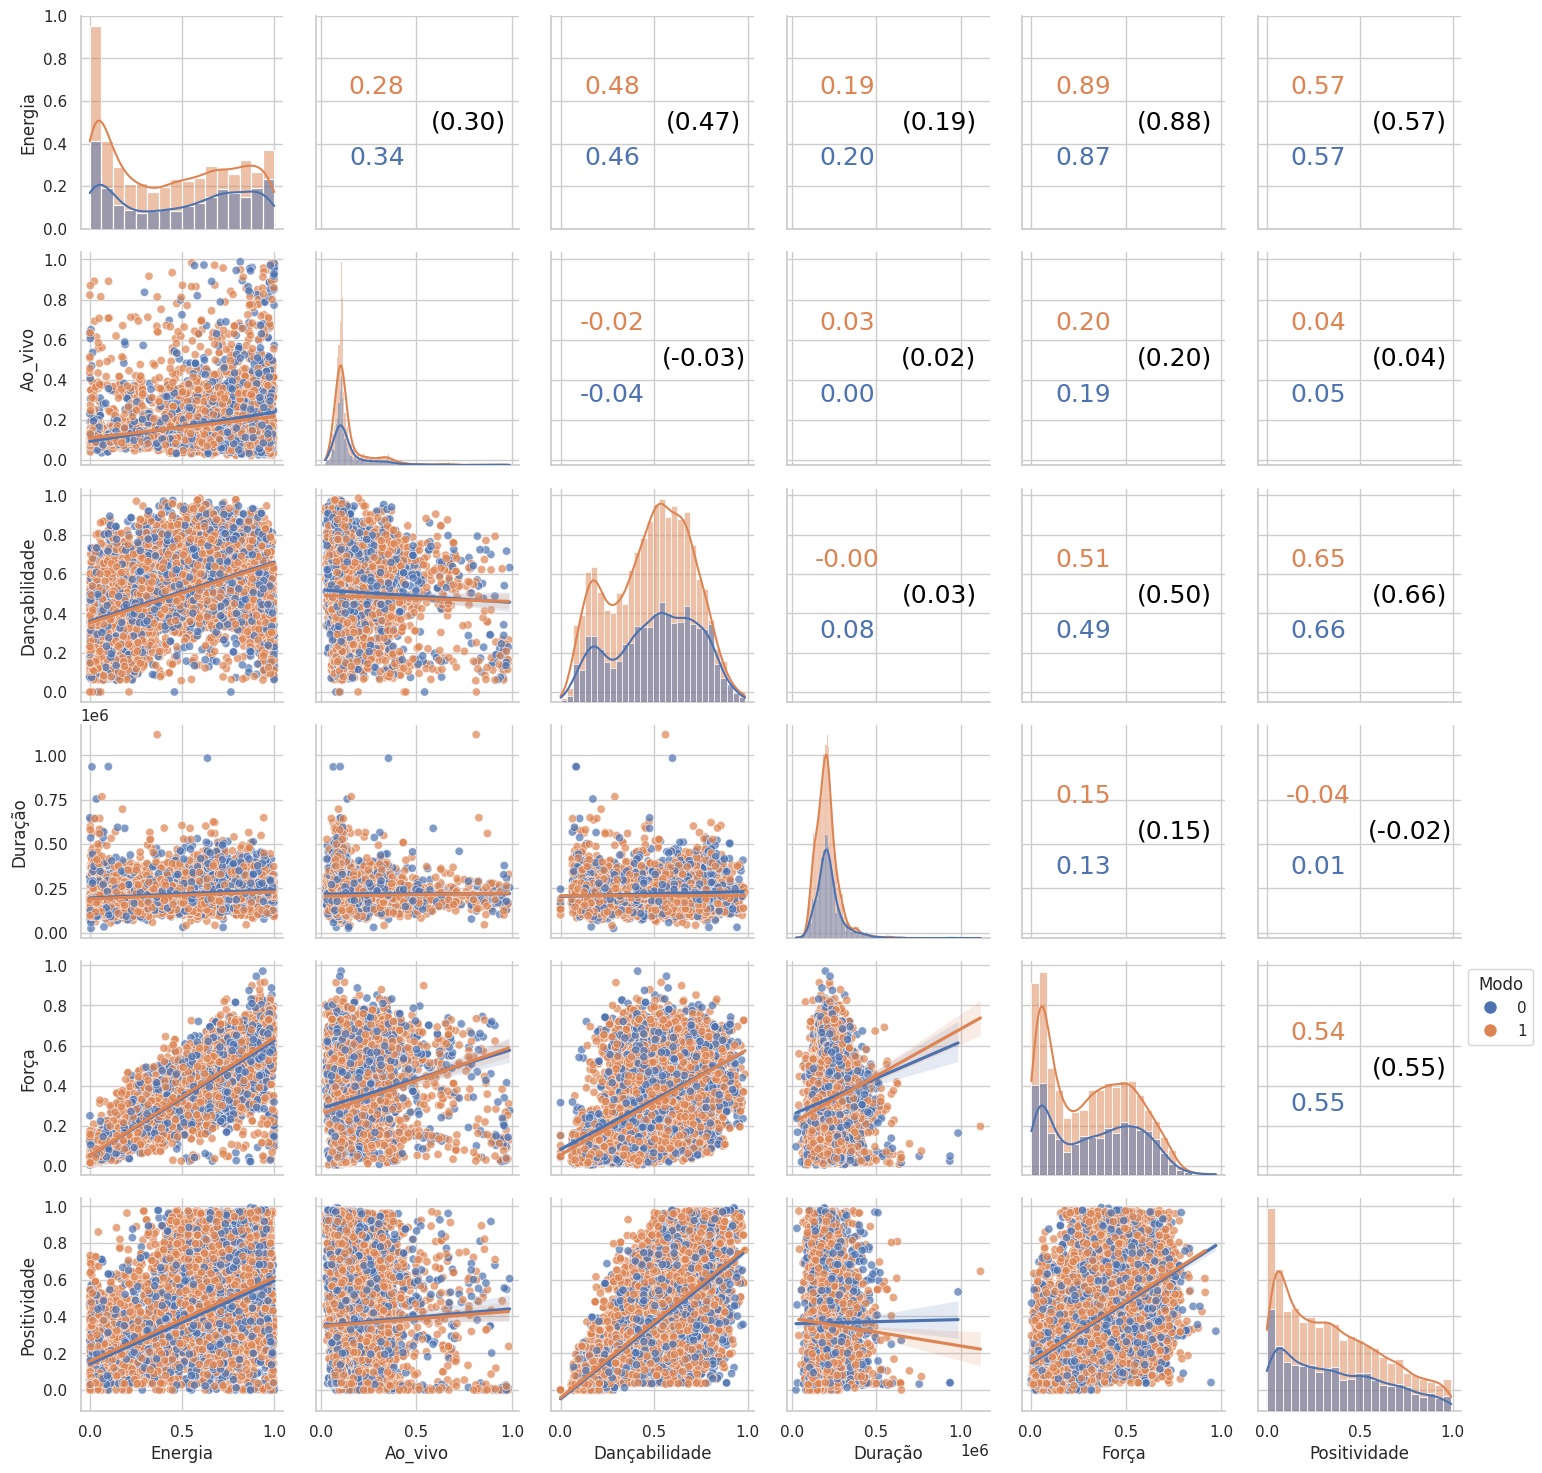

In [18]:
# Para não incluir uma variável Grupo, basta não fornecê-la para a função
# pair_plot(df, ['Energia', 'Ao_vivo', 'Dançabilidade', 'Duração', 'Força', 'Positividade'])
pair_plot(df, ['Energia', 'Ao_vivo', 'Dançabilidade', 'Duração', 'Força', 'Positividade'], hue = "Modo")

Veja que a correlação geral entre as variáveis numéricas, considerando os grupos da variável "Modo" são muito similares e, de fato, a correlação geral de toda a nuvem de pontos parece ser a média das correlações de cada grupo. Isso indica que a variável "Modo" não aparenta ter uma contribuição significativa na interação entre esses pares de variáveis, ou seja, o comportamento de Y quando X aumenta (X e Y quaisquer uma das variáveis numéricas acima) parece não depender da variável "Modo".

Essa ideia da correlação geral (desconsiderando o grupo) ser a média das correlações de todos os grupos faz sentido em um contexto geral? A resposta é NÃO! De fato, podemos obter resultados completamente diferentes para a correlação geral, quando comparada aos grupos. Abaixo temos um exemplo com o conhecido conjunto de dados Iris.

In [19]:
from sklearn import datasets

# Carrega o conjunto de dados
data = datasets.load_iris(as_frame = True)
df_iris = data.frame
df_iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Atualiza para os nomes das espécies
df_iris["species"] = df_iris["species"].astype(str)
df_iris.loc[df_iris["species"] == "0", "species"] = "setosa"
df_iris.loc[df_iris["species"] == "1", "species"] = "versicolor"
df_iris.loc[df_iris["species"] == "2", "species"] = "virginica"

df_iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


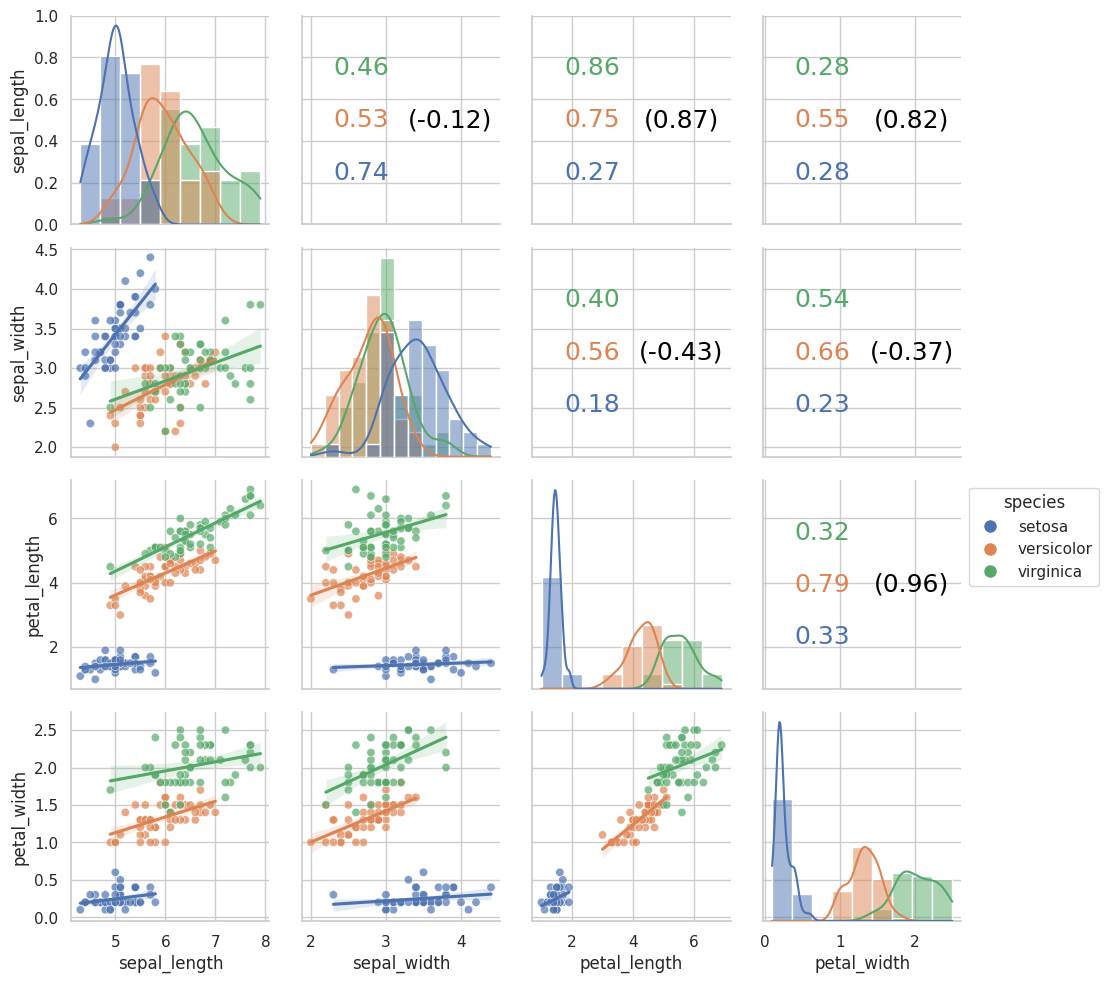

In [20]:
pair_plot(df_iris, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue = "species")

Veja, por exemplo, na interação entre "sepal_width" e "petal_length". As correlações individuais de cada grupo indicam uma correlação positiva entre as variáveis, ou seja, o aumento de uma leva ao aumento da outra. Entretanto, veja que a correlação geral (desconsiderando os grupos) é negativa! Sendo assim, se não conhecemos qual o grupo de cada flor, então passamos a dizer que "sepal_width" de fato diminui com o aumento de "petal_length". Parece um resultado contraditório, não?

De fato, esse fenômeno é conhecido como Paradoxo de Simpson, uma vez que parece não fazer sentido! De fato, esse paradoxo demonstra o quão complexas podem ser as relações entre duas variáveis, de modo que a simples adição de uma nova variável (o grupo da flor, neste caso) pode mudar completamente a interpretação dos resultados obtidos.